In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree


In [93]:
df = pd.read_csv("./datasets/train.csv")

In [94]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [95]:
print(df.dtypes)
df.describe()

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [96]:
# How many null values are there
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

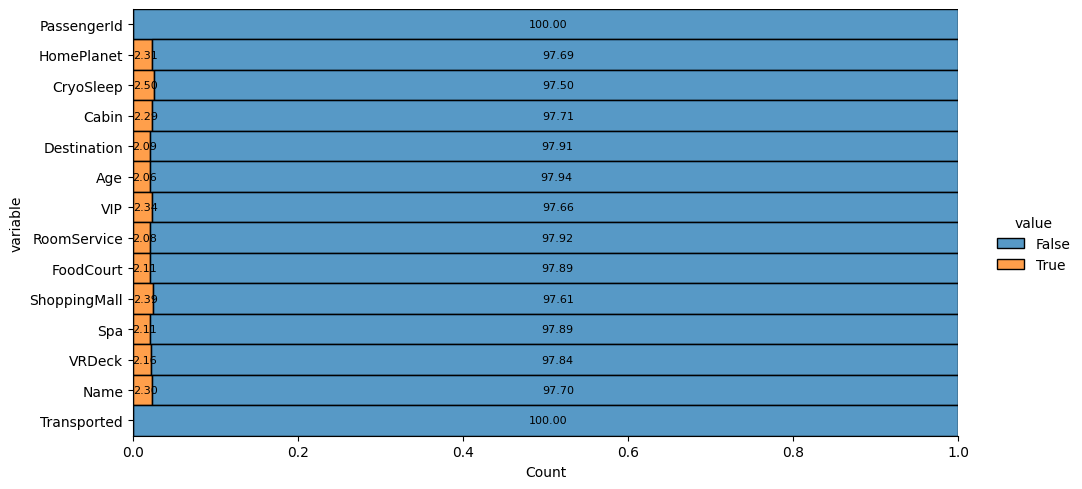

In [97]:
# seeing the null values proportion
fg = df.isnull().melt().pipe(
    lambda df: (
        sns.displot(
            data=df,
            y="variable",
            hue="value",
            aspect=2,
            multiple = "fill"
        )
    )
)

for ax in fg.axes.ravel():
    # add annotations
    for c in ax.containers:
        # custom label calculates value and adds an empty string so 0 value bars don't have a number
        labels = [f'{w:.2f}' if (w := (v.get_width())*100) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=8, rotation=0, padding=2)
    ax.margins(x=0.2)

plt.show()

The  null values represents a very low percentage of the data (around 2%)
_____________________

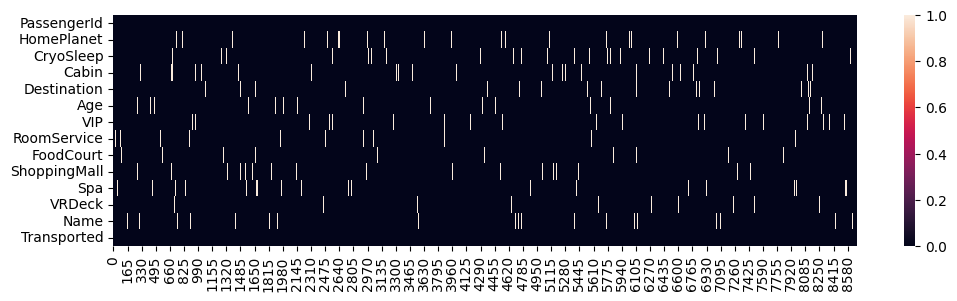

In [98]:
# See the null values on the whole dataset
plt.figure(figsize=(12, 3))

(
    df.isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data = df
            )
        )
    )
)
plt.show()

Here we can see that most of the null data is distributed into diffetent rows or records.
___________

In [99]:
# Creating a new variable without null values
passengers = df.dropna()
passengers.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [100]:
# How Many passengers were transported?
passengers["Transported"].value_counts()

Transported
True     3327
False    3279
Name: count, dtype: int64

In [101]:
# Enconding categorical variables (One Hot encoding) and boolean variables into int values

columns_to_encode = ["HomePlanet", "Destination"]
df_encoded = pd.get_dummies(passengers, columns=columns_to_encode)

# Convert Bool Values into number
df_encoded[["CryoSleep", "VIP", 'Transported','HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22','Destination_TRAPPIST-1e']] = df_encoded[["CryoSleep", "VIP", 'Transported','HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22','Destination_TRAPPIST-1e']].astype(int)

# Splitting cabin column into "Deck/Cabin_num/Side"
df_encoded[["Deck" , "Cabin_num", "Side"]] = df_encoded["Cabin"].str.split("/", expand = True).astype("category")
df_encoded["Cabin_num"] = df_encoded["Cabin_num"].astype("int")

# Removing the columns that was splited
df_encoded.drop("Cabin", axis = 1, inplace=True)

df_encoded.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,Cabin_num,Side
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,1,0,0,0,1,B,0,P
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,0,0,0,0,1,F,0,S
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,1,0,0,0,1,A,0,S
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,1,0,0,0,1,A,0,S
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,0,0,0,0,1,F,1,S


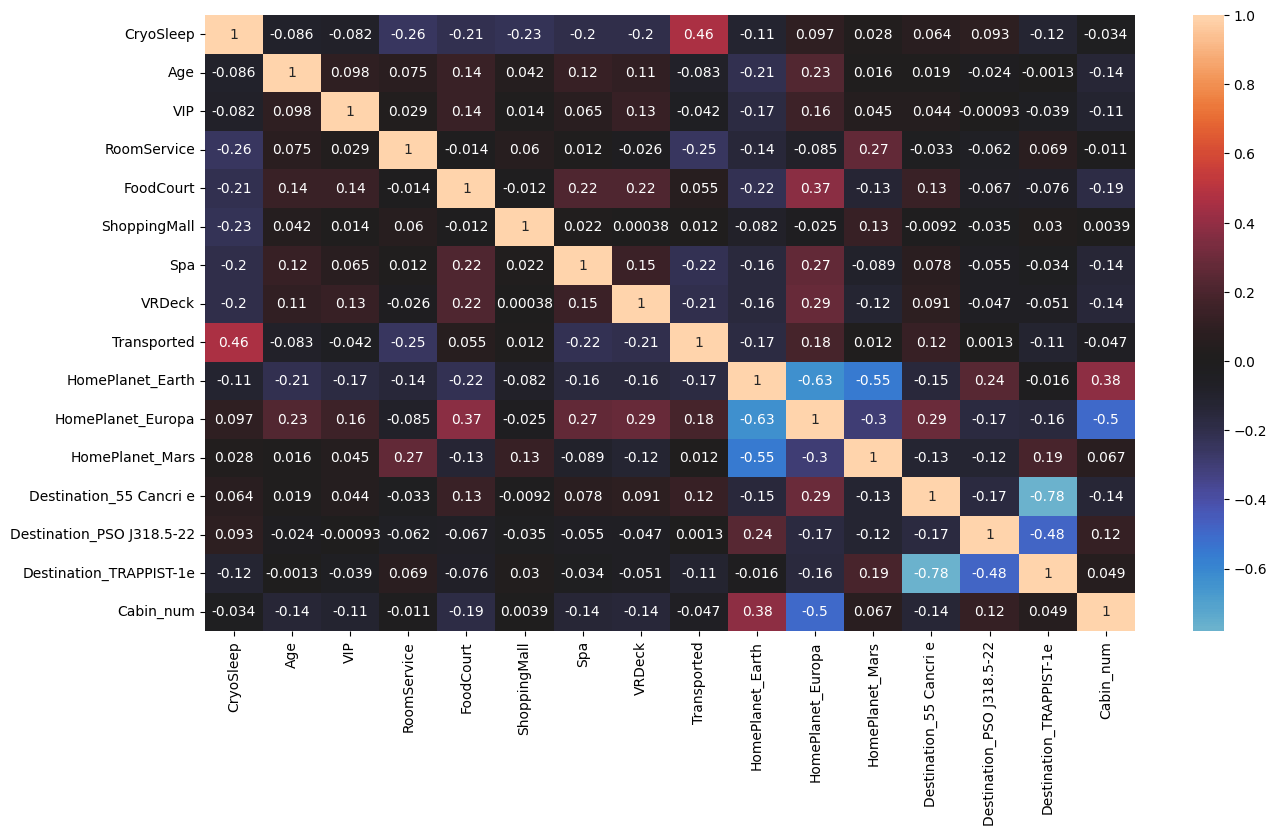

In [102]:
encoded_corr = df_encoded.select_dtypes(include=[np.number]).corr()

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(
    data= encoded_corr,
    center = 0,
    annot = True
)
plt.show()

'CryoSleep','RoomService', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'Destination_TRAPPIST-1e',  'Destination_55 Cancri e'

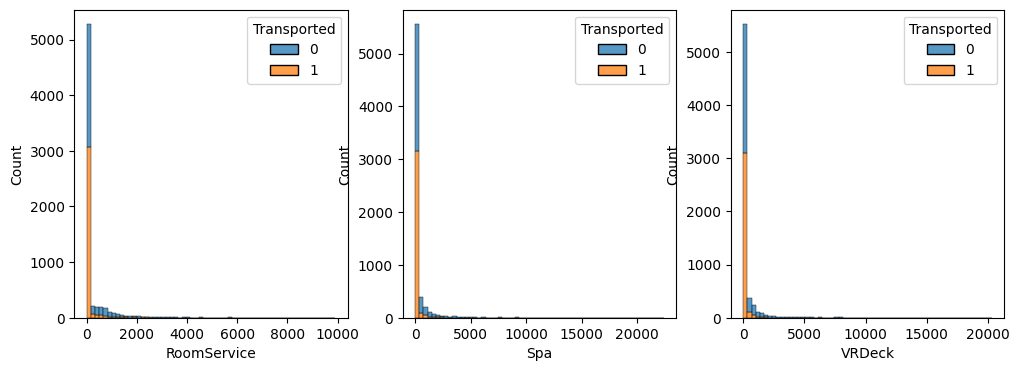

In [103]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data = df_encoded, x="RoomService", ax=axs[0], bins= 60, hue="Transported", multiple= "stack")
sns.histplot(data=df_encoded, x='Spa', ax=axs[1], bins= 60,  hue="Transported", multiple= "stack")
sns.histplot(data=df_encoded, x='VRDeck', ax=axs[2], bins= 60,  hue="Transported", multiple= "stack")

plt.show()

/home/alphalejo/anaconda3/envs/spaceship/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


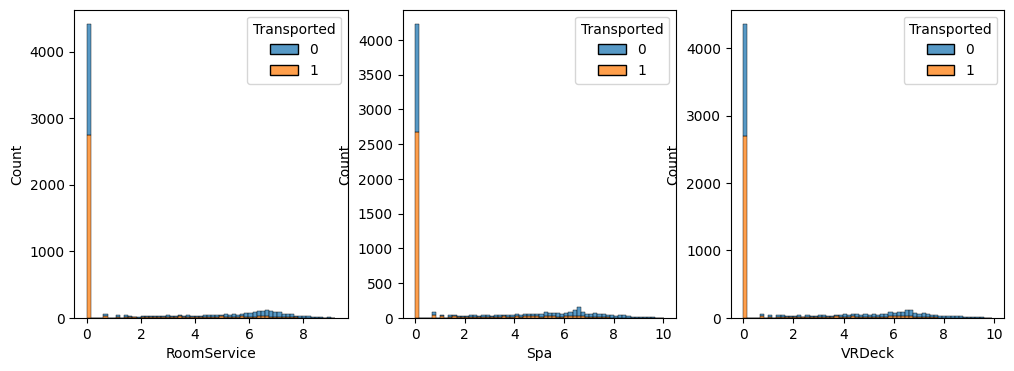

In [104]:
df_encoded[["RoomService","Spa","VRDeck"]] = np.log(df_encoded[["RoomService","Spa","VRDeck"]]).replace(-np.inf, 0)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data = df_encoded, x="RoomService", ax=axs[0], bins= 60, hue="Transported", multiple= "stack")
sns.histplot(data=df_encoded, x='Spa', ax=axs[1], bins= 60,  hue="Transported", multiple= "stack")
sns.histplot(data=df_encoded, x='VRDeck', ax=axs[2], bins= 60,  hue="Transported", multiple= "stack")

plt.show()


# Trying diferent models

## Logistic regresion

In [105]:
X = df_encoded[['CryoSleep','RoomService', 'Spa', 'VRDeck', 'HomePlanet_Europa', "HomePlanet_Mars"]]
y = df_encoded["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7723146747352496


## Naive Bayes

In [106]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the classifier to the training data and make predictions on the test data
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7609682299546142


##  K-Nearest Neighbors

In [107]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the classifier to the training data and make predictions on the test data
y_pred = knn.fit(X_train, y_train).predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7639939485627837


## Decision Tree

In [108]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data and make predictions on the test data
y_pred = clf.fit(X_train, y_train).predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7344931921331316


# Modifiying the data to improve the results

In [109]:
second_df = df_encoded.drop(['PassengerId', 'Name', 'Age', 'VIP', 'ShoppingMall', 'HomePlanet_Mars', 'Destination_PSO J318.5-22', 'Cabin_num'], axis=1)

In [110]:
# Enconding categorical variables (One Hot encoding) and boolean variables into int values

columns_to_encode_2 = ["Deck", "Side"]
second_df = pd.get_dummies(second_df, columns=columns_to_encode_2)

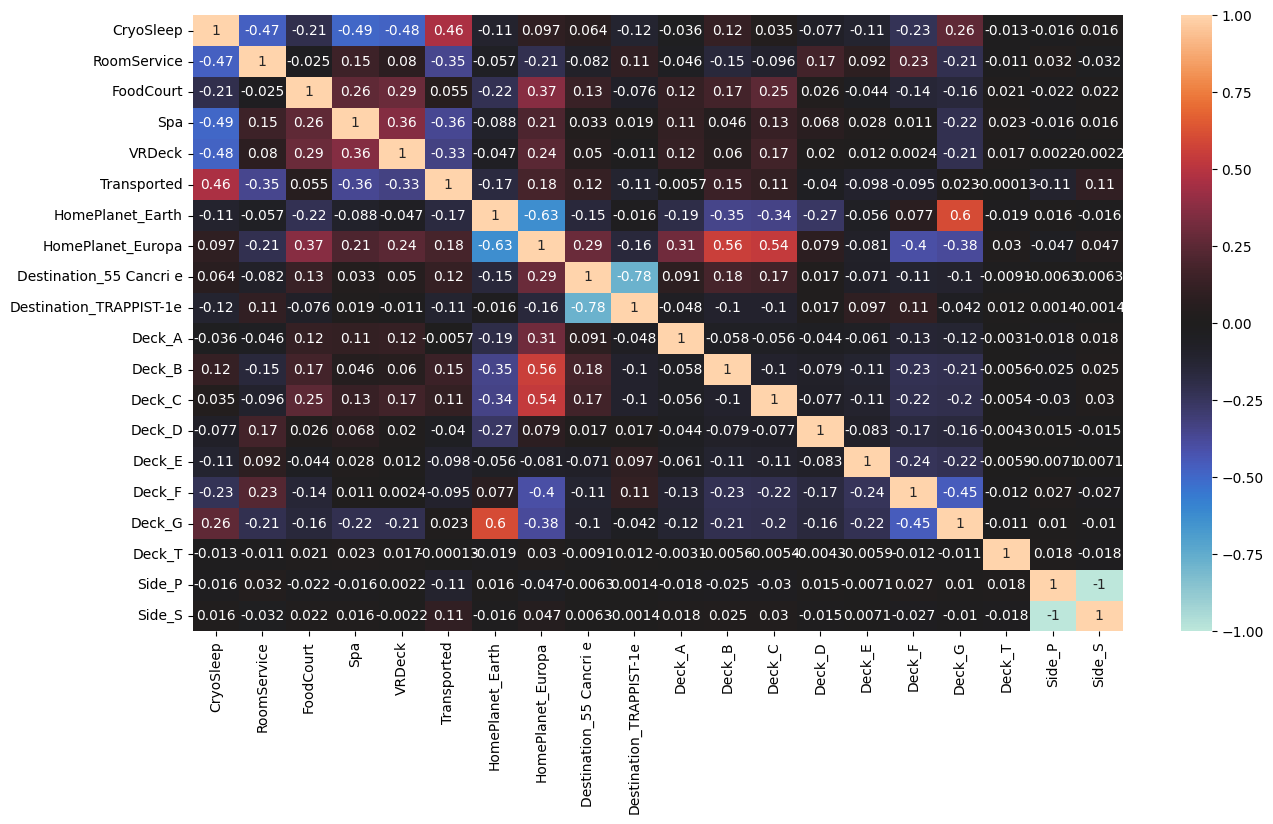

In [111]:
corr_2 = second_df.corr()

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(
    data= corr_2,
    annot=True,
    center= 0
)
plt.show()

CryoSleep                    int64
RoomService                float64
FoodCourt                  float64
Spa                        float64
VRDeck                     float64
Transported                  int64
HomePlanet_Earth             int64
HomePlanet_Europa            int64
Destination_55 Cancri e      int64
Destination_TRAPPIST-1e      int64
Deck_A                        bool
Deck_B                        bool
Deck_C                        bool
Deck_D                        bool
Deck_E                        bool
Deck_F                        bool
Deck_G                        bool
Deck_T                        bool
Side_P                        bool
Side_S                        bool
dtype: object

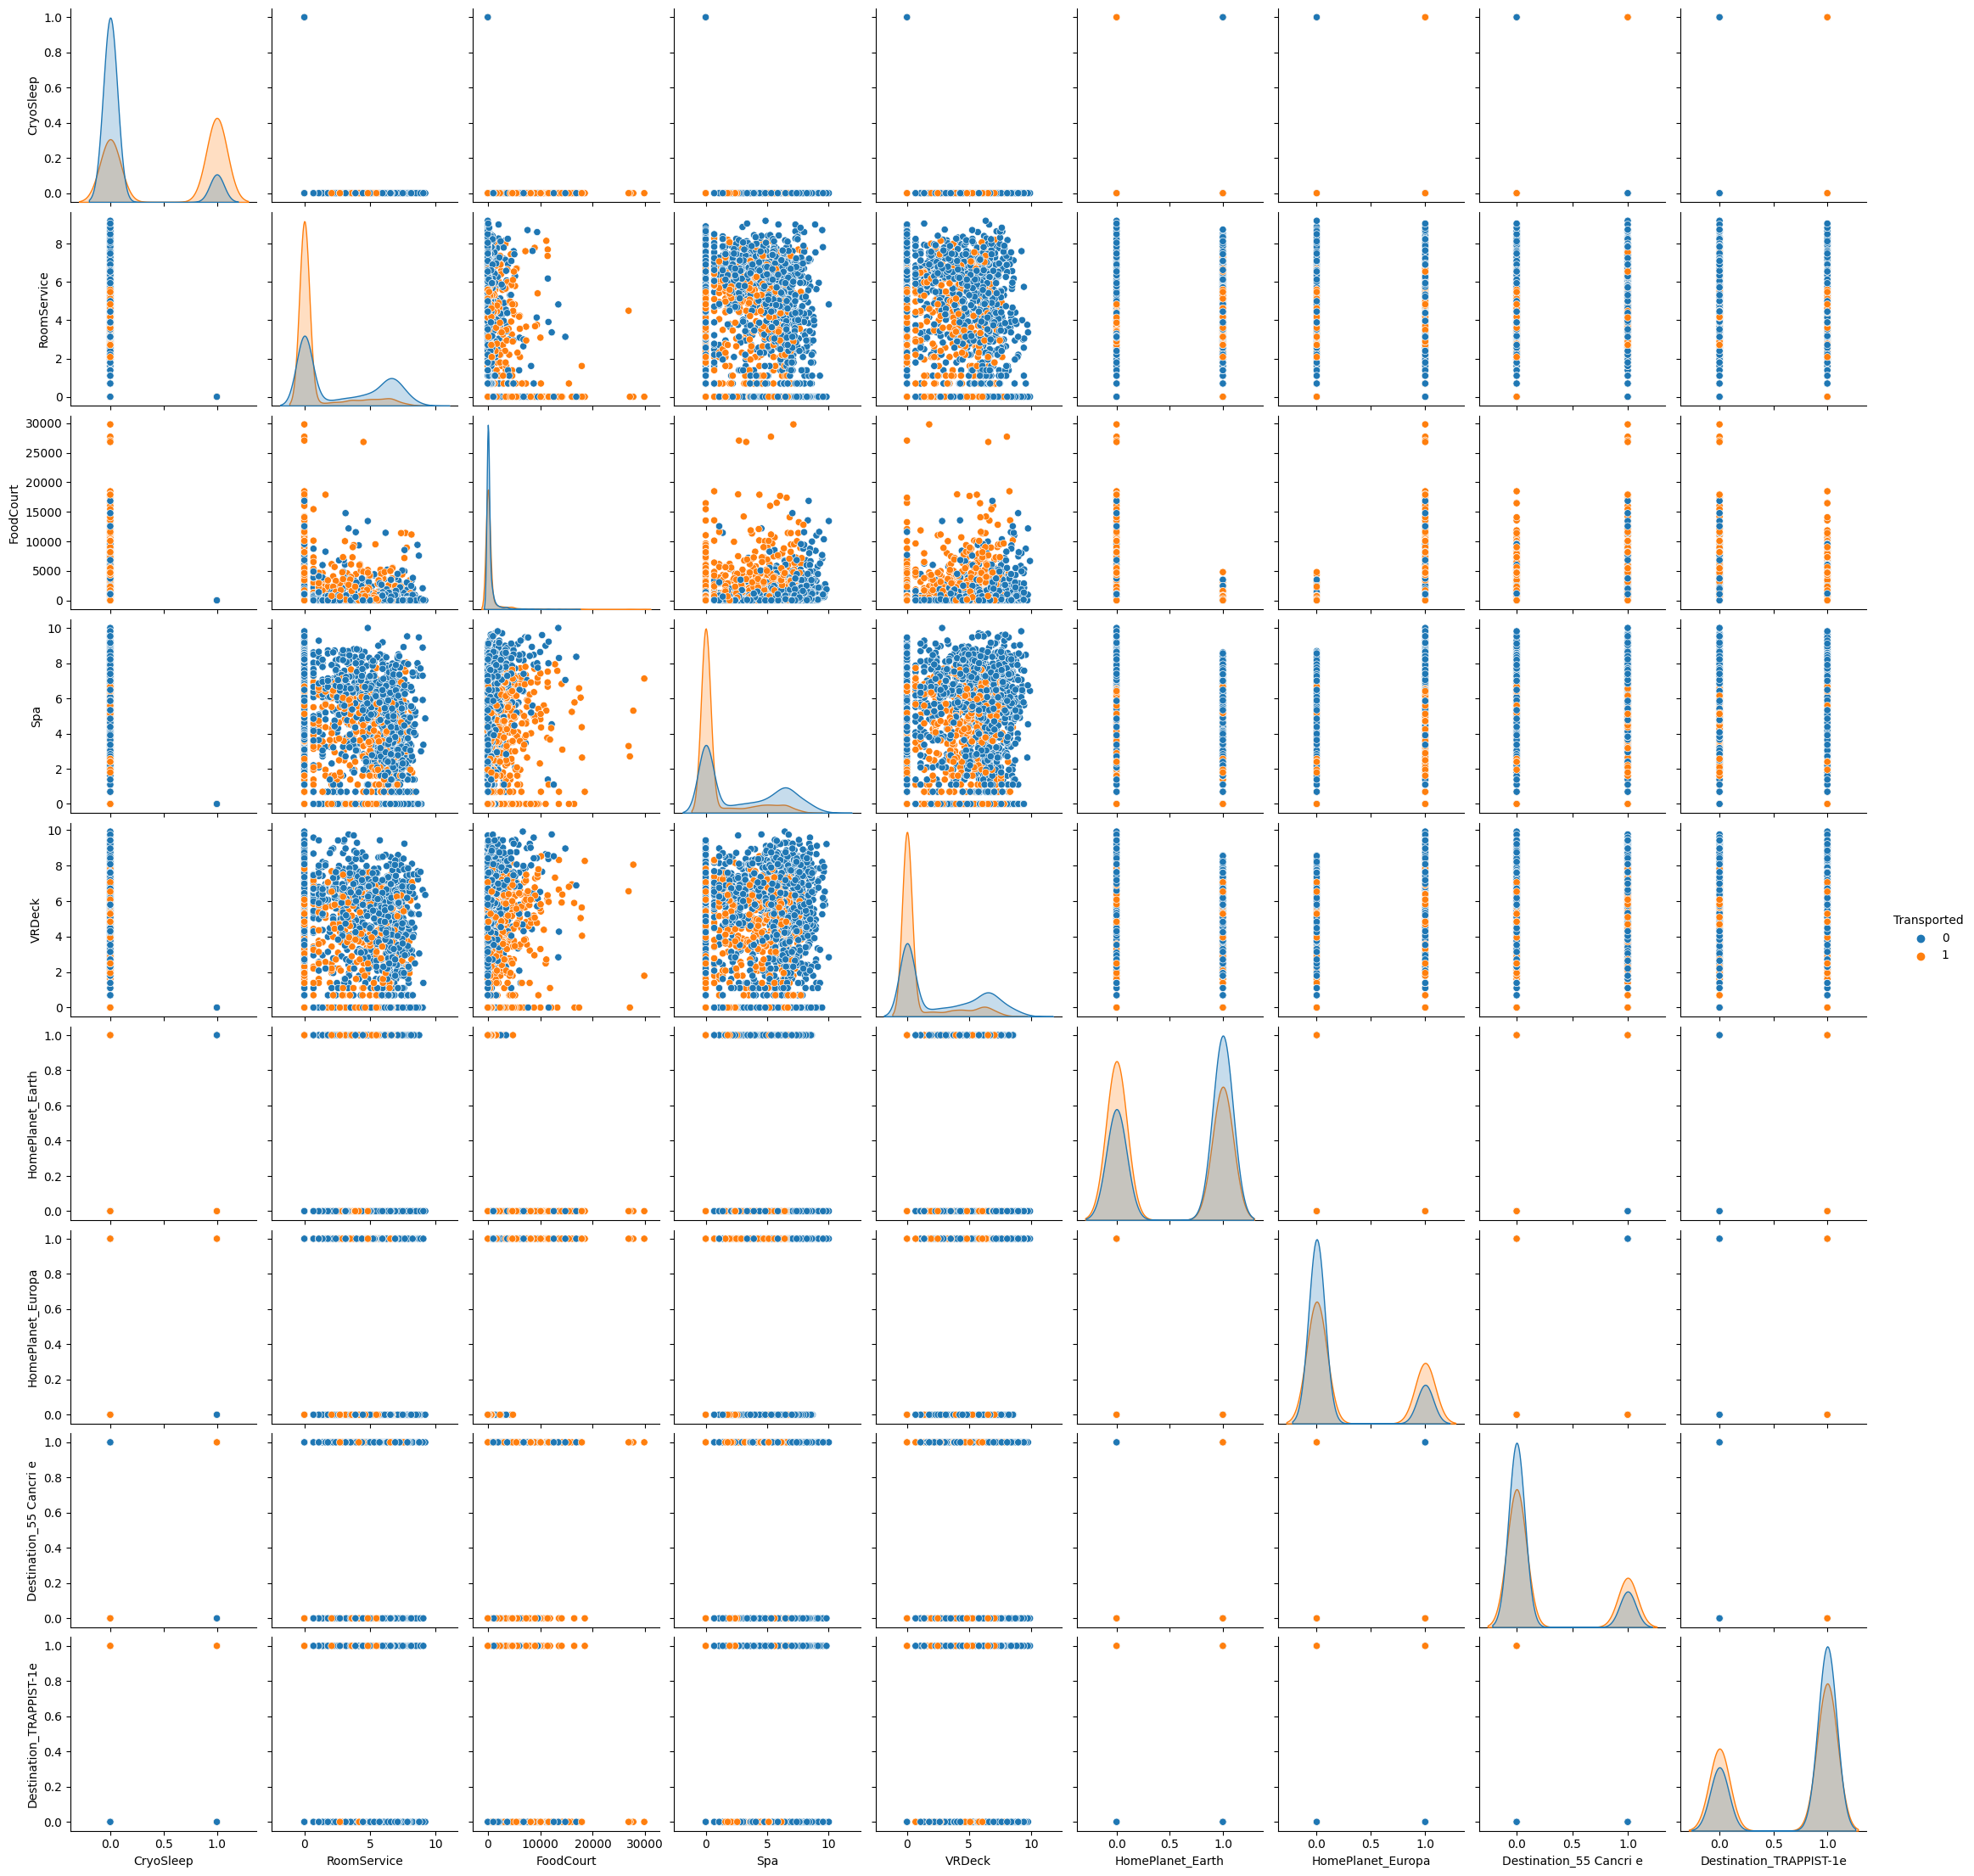

In [120]:
sns.pairplot(
    data=second_df.select_dtypes(include=["int64", "float64"]),
    hue = "Transported"
)

plt.show()

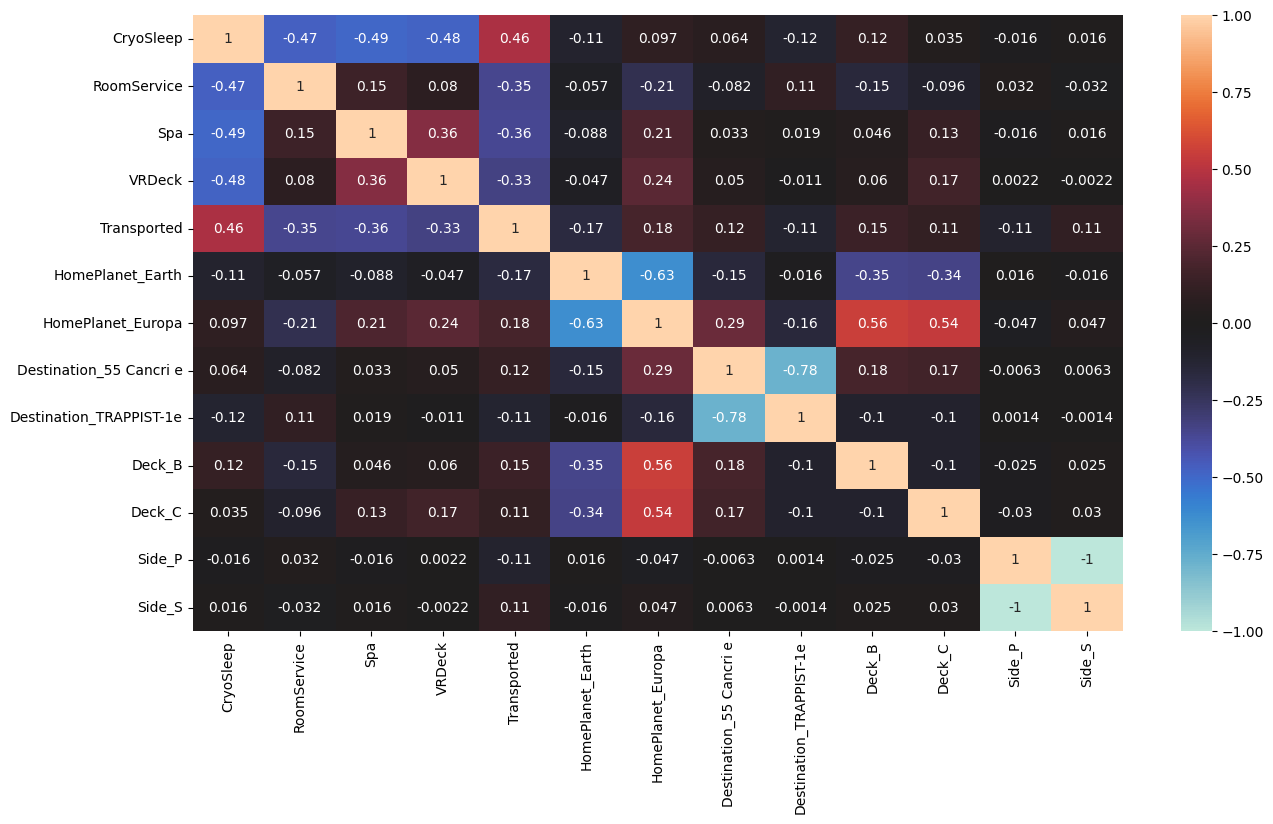

In [ ]:
# Removing again low correlated data to leave only the relevan columns

third_df = second_df.drop(['Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_A', 'FoodCourt'], axis=1)

corr_3 = third_df.corr()

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(
    data= corr_3,
    annot=True,
    center= 0
)
plt.show()

## Logistig regression 2

In [ ]:
X = third_df[['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet_Earth', 
            'HomePlanet_Europa', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e',
            'Deck_B', 'Deck_C', 'Side_P', 'Side_S']]
y = third_df["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7768532526475038


## Random Forest Classifier

In [ ]:
X = third_df[['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet_Earth', 
            'HomePlanet_Europa', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e',
            'Deck_B', 'Deck_C', 'Side_P', 'Side_S']]
y = third_df["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=3,
                             max_depth=5,
                             random_state=42)

# Fit RandomForestClassifier
rfc.fit(X_train, y_train)

# Predict the test set labels
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7677760968229954


DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)


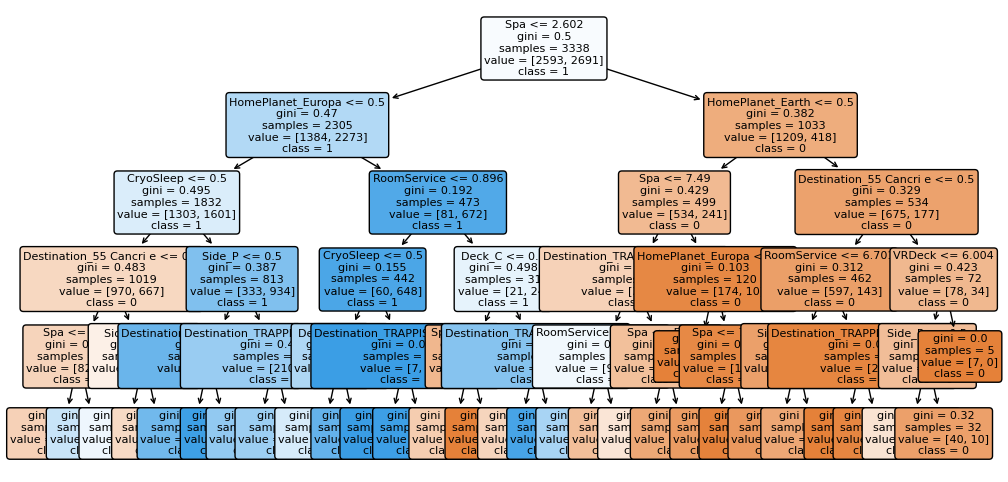

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)


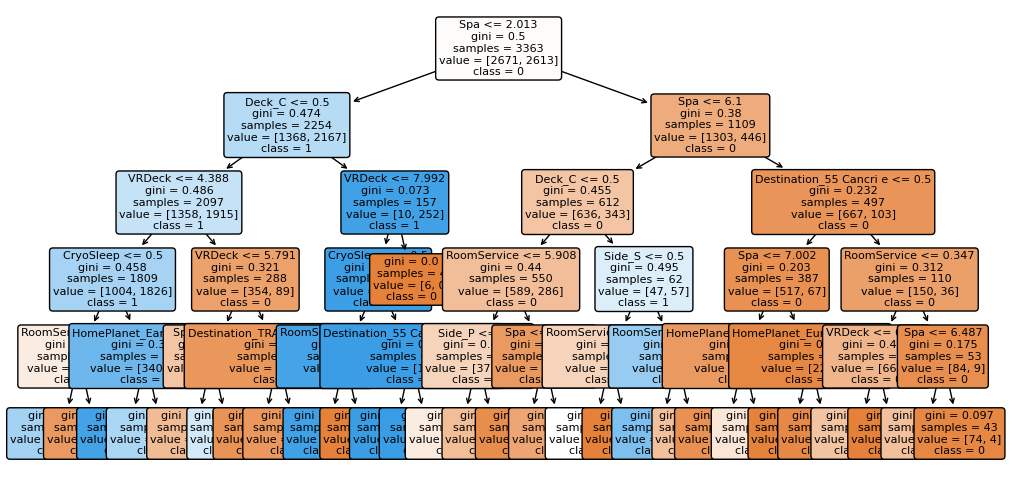

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)


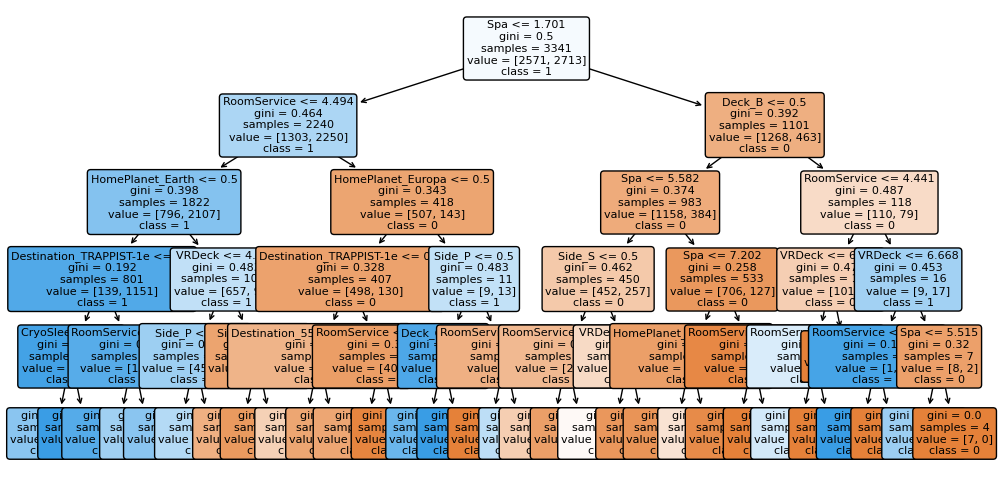

In [ ]:
features = X.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()